# Proyecto primario: Detección de Tipos de Tejidos Humanos y su Estado Patológico Mediante el Uso de Herramientas de Procesamiento de Imágenes e Inteligencia Artificial

__Estudiantes:__

- Kendall Tames
- Kevin Trejos

In [1]:
%load_ext tensorboard
from pytorch_lightning import seed_everything
_ = seed_everything(42, workers=True)

Seed set to 42


In [2]:
from shared_definitions import LC25000DataModule
data = LC25000DataModule()

2025-07-02 22:23:28.199817: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-02 22:23:28.212344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751516608.226198   49914 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751516608.230291   49914 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751516608.242963   49914 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Entrenamiento de las redes

Para estos entrenamientos, las definiciones se encuentran en el archivo de `shared_definitions`. Esto hace que el cuaderno como tal sea lo más limpio posible y nos enfoquemos en los resultados obtenidos en lugar del diseño del código.

Además, se utiliza tensorboard para guardar los resultados de las ejecuciones y un checkpoint callback para tener un snapshot del mejor modelo para cada arquitectura, lo que permite entrenar los modelos una sola vez y tener toda la información segura para un análisis posterior.

### Entrenamiento ResNet 50

In [3]:
from shared_definitions import ResNet50Classifier, create_trainer

model = ResNet50Classifier(
    lr=1e-4,
    freeze_backbone=True,
)

trainer = create_trainer(
    logger_name="resnet50_lung_colon",
    filename="best-hf-resnet50",
)

trainer.fit(model, datamodule=data)

Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([4, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name       ┃ Type                         ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ loss_fn    │ CrossEntropyLoss             │      0 │ train │
│ 1  │ train_acc  │ MulticlassAccuracy           │      0 │ train │
│ 2  │ val_acc    │ MulticlassAccuracy           │      0 │ train │
│ 3  │ test_acc   │ MulticlassAccuracy           │      0 │ train │
│ 4  │ train_f1   │ MulticlassF1Score            │      0 │ train │
│ 5  │ val_f1     │ MulticlassF1Score            │      0 │ train │
│ 6  │ test_f1    │ MulticlassF1Score            │      0 │ train │
│ 7  │ train_prec │ MulticlassPrecision          │      0 │ train │
│ 8  │ val_prec   │ MulticlassPrecision          │      0 │ train │
│ 9  │ test_prec  │ MulticlassPrecision          │      0 │ train │
│ 10 │ train_spec │ MulticlassSpecificity        │      0 │ train │
│ 11 │ val_spec   │ MulticlassSpecificity        │      0 │ train │
│ 12 │ test_spec  │ MulticlassSpecificity        │      0 │ train │
│ 13 │ train_rec  │ MulticlassRecall             │      0 │ train │
│ 14 │ val_rec    │ MulticlassRecall             │      0 │ train │
│ 15 │ test_rec   │ MulticlassRecall             │      0 │ train │
│ 16 │ val_cm     │ MulticlassConfusionMatrix    │      0 │ train │
│ 17 │ test_cm    │ MulticlassConfusionMatrix    │      0 │ train │
│ 18 │ model      │ ResNetForImageClassification │ 23.5 M │ eval  │
└────┴────────────┴──────────────────────────────┴────────┴───────┘

Trainable params: 8.2 K                                                                                            
Non-trainable params: 23.5 M                                                                                       
Total params: 23.5 M                                                                                               
Total estimated model params size (MB): 94                                                                         
Modules in train mode: 18                                                                                          
Modules in eval mode: 286

Output()

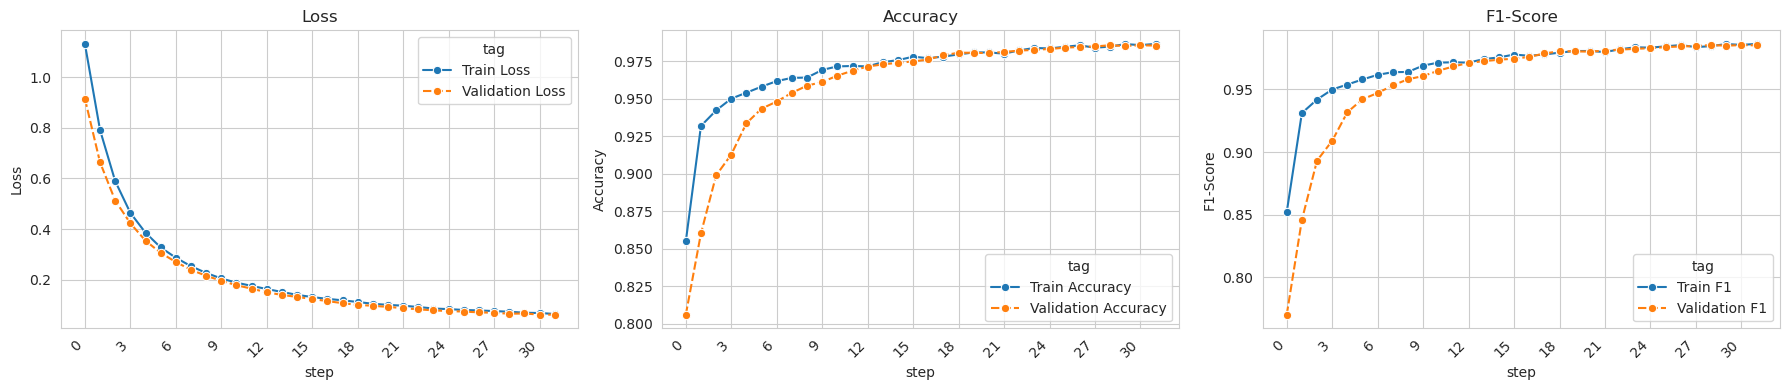

In [4]:
from shared_definitions import draw_curves

draw_curves("tb_logs/resnet50_lung_colon/version_0")

### Entrenamiento Yolo11

In [5]:
from shared_definitions import YOLOv11Classifier

yolo_model = YOLOv11Classifier(
    lr=1e-4,
    freeze_backbone=True,
)

yolo_trainer = create_trainer(
    logger_name="yolov11_lung_colon",
    filename="best-hf-yolov11",
)

yolo_trainer.fit(yolo_model, datamodule=data)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name       ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ loss_fn    │ CrossEntropyLoss          │      0 │ train │
│ 1  │ train_acc  │ MulticlassAccuracy        │      0 │ train │
│ 2  │ val_acc    │ MulticlassAccuracy        │      0 │ train │
│ 3  │ test_acc   │ MulticlassAccuracy        │      0 │ train │
│ 4  │ train_f1   │ MulticlassF1Score         │      0 │ train │
│ 5  │ val_f1     │ MulticlassF1Score         │      0 │ train │
│ 6  │ test_f1    │ MulticlassF1Score         │      0 │ train │
│ 7  │ train_prec │ MulticlassPrecision       │      0 │ train │
│ 8  │ val_prec   │ MulticlassPrecision       │      0 │ train │
│ 9  │ test_prec  │ MulticlassPrecision       │      0 │ train │
│ 10 │ train_spec │ MulticlassSpecificity     │      0 │ train │
│ 11 │ val_spec   │ MulticlassSpecificity     │      0 │ train │
│ 12 │ test_spec  │ MulticlassSpecificity     │      0 │ train │
│ 13 │ train_rec  │ MulticlassRecall          │      0 │ train │
│ 14 │ val_rec    │ MulticlassRecall          │      0 │ train │
│ 15 │ test_rec   │ MulticlassRecall          │      0 │ train │
│ 16 │ val_cm     │ MulticlassConfusionMatrix │      0 │ train │
│ 17 │ test_cm    │ MulticlassConfusionMatrix │      0 │ train │
│ 18 │ model      │ ClassificationModel       │  1.5 M │ eval  │
└────┴────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 5.1 K                                                                                            
Non-trainable params: 1.5 M                                                                                        
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6                                                                          
Modules in train mode: 19                                                                                          
Modules in eval mode: 150

Output()

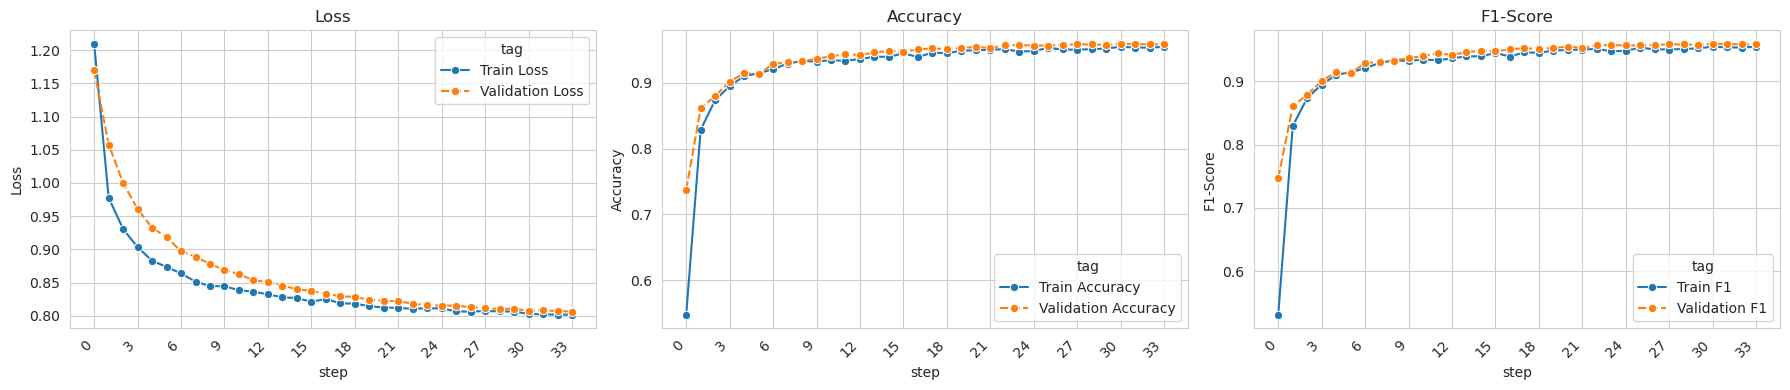

In [6]:
from shared_definitions import draw_curves

draw_curves("tb_logs/yolov11_lung_colon/version_0")

### Entrenamiento Inception v4

In [7]:
from shared_definitions import InceptionV4Classifier

inception_model = InceptionV4Classifier(
    lr=1e-4,
    freeze_backbone=True,
)

inception_trainer = create_trainer(
    logger_name="inceptionv4_lung_colon",
    filename="best-hf-inceptionv4",
)

inception_trainer.fit(inception_model, datamodule=data)

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/inception_v4.tf_in1k and are newly initialized because the shapes did not match:
- timm_model.last_linear.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- timm_model.last_linear.weight: found shape torch.Size([1000, 1536]) in the checkpoint and torch.Size([4, 1536]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name       ┃ Type                              ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ loss_fn    │ CrossEntropyLoss                  │      0 │ train │
│ 1  │ train_acc  │ MulticlassAccuracy                │      0 │ train │
│ 2  │ val_acc    │ MulticlassAccuracy                │      0 │ train │
│ 3  │ test_acc   │ MulticlassAccuracy                │      0 │ train │
│ 4  │ train_f1   │ MulticlassF1Score                 │      0 │ train │
│ 5  │ val_f1     │ MulticlassF1Score                 │      0 │ train │
│ 6  │ test_f1    │ MulticlassF1Score                 │      0 │ train │
│ 7  │ train_prec │ MulticlassPrecision               │      0 │ train │
│ 8  │ val_prec   │ MulticlassPrecision               │      0 │ train │
│ 9  │ test_prec  │ MulticlassPrecision               │      0 │ train │
│ 10 │ train_spec │ MulticlassSpecificity             │      0 │ train │
│ 11 │ val_spec   │ MulticlassSpecificity             │      0 │ train │
│ 12 │ test_spec  │ MulticlassSpecificity             │      0 │ train │
│ 13 │ train_rec  │ MulticlassRecall                  │      0 │ train │
│ 14 │ val_rec    │ MulticlassRecall                  │      0 │ train │
│ 15 │ test_rec   │ MulticlassRecall                  │      0 │ train │
│ 16 │ val_cm     │ MulticlassConfusionMatrix         │      0 │ train │
│ 17 │ test_cm    │ MulticlassConfusionMatrix         │      0 │ train │
│ 18 │ model      │ TimmWrapperForImageClassification │ 41.1 M │ eval  │
└────┴────────────┴───────────────────────────────────┴────────┴───────┘

Trainable params: 6.1 K                                                                                            
Non-trainable params: 41.1 M                                                                                       
Total params: 41.1 M                                                                                               
Total estimated model params size (MB): 164                                                                        
Modules in train mode: 18                                                                                          
Modules in eval mode: 831

Output()

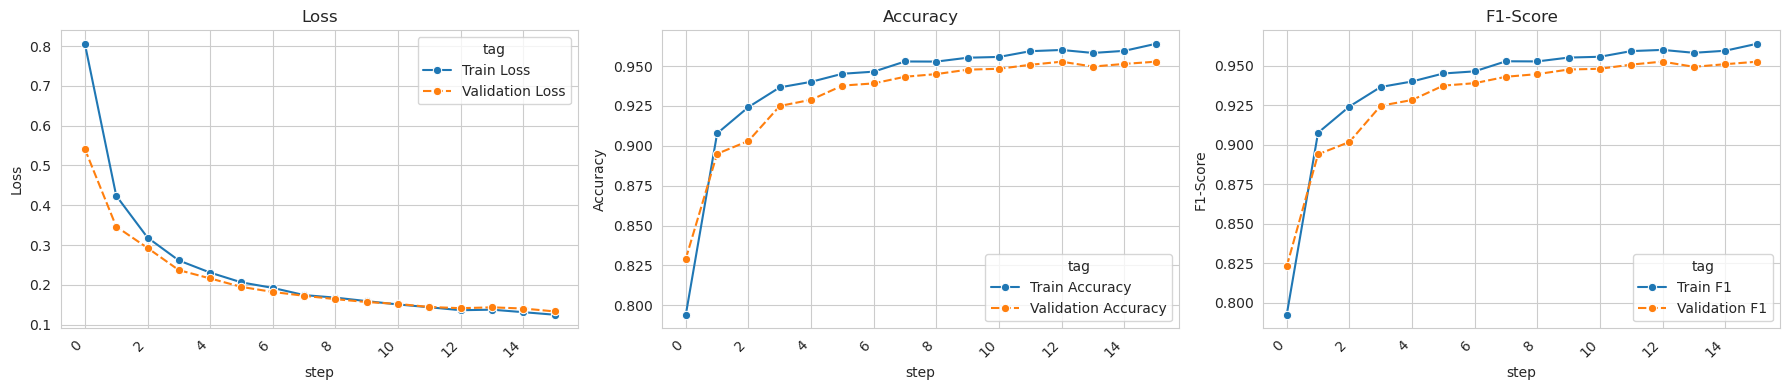

In [8]:
from shared_definitions import draw_curves

draw_curves("tb_logs/inceptionv4_lung_colon/version_0")